In [42]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from scipy import misc
import pandas as pd
%matplotlib inline

In [43]:
train_labels = open('Train/labels.txt')
data = np.loadtxt(train_labels,delimiter = ' ',dtype=str)

In [44]:
train_imname = data[0:,0]
train_y = np.array([[int(x) for x in data[0:,1]]])

In [45]:
train_x_orig = []
for name in train_imname:
    s = "Train/"+name
    train_x_orig.append(Image.open(s).convert('L')) #Accuracy with L more than LA

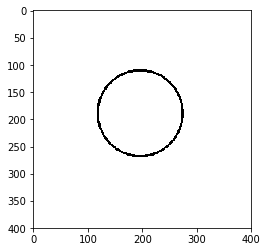

In [46]:
plt.imshow(train_x_orig[0])

In [6]:
test_labels = open('Test/labels.txt')
data = np.loadtxt(test_labels,delimiter = ' ',dtype=str)
test_imname = data[0:,0]
test_y = np.array([[int(x) for x in data[0:,1]]])
test_x_orig = []
for name in test_imname:
    s = "Test/"+name
    test_x_orig.append(Image.open(s).convert('L'))

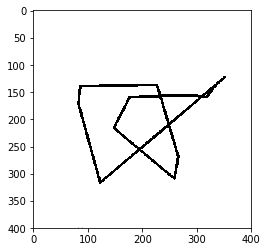

In [7]:
plt.imshow(test_x_orig[-2])

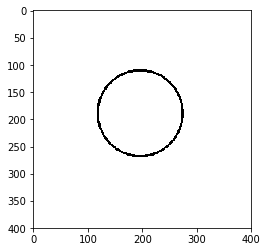

In [9]:
train_set_x_orig = np.array([np.array(i) for i in train_x_orig])
plt.imshow(train_set_x_orig[0],cmap='gray')

In [10]:
test_set_x_orig = np.array([np.array(i) for i in test_x_orig])

In [11]:
m_train = train_y.shape[0]
m_test = test_y.shape[0]

In [12]:
train_set_x_orig.shape

(16, 400, 400)

In [13]:
train_set_x_orig.shape

(16, 400, 400)

In [14]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [15]:
train_set_x_flatten

array([[255, 255, 255, ..., 199, 195, 255],
       [255, 255, 255, ..., 199, 195, 255],
       [255, 255, 255, ..., 199, 195, 255],
       ...,
       [255, 255, 255, ..., 199, 195, 255],
       [255, 255, 255, ..., 199, 195, 255],
       [255, 255, 255, ..., 199, 195, 255]], dtype=uint8)

In [16]:
test_set_x_flatten.shape

(160000, 18)

In [47]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [48]:
train_set_x

array([[1.        , 1.        , 1.        , ..., 0.78039216, 0.76470588,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.78039216, 0.76470588,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.78039216, 0.76470588,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.78039216, 0.76470588,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.78039216, 0.76470588,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.78039216, 0.76470588,
        1.        ]])

In [18]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

print(sigmoid(0))

0.5


In [19]:
def init_with_zeros(dim):
    w = np.zeros(shape = (dim,1))
    b= 0
    return w,b

In [49]:
dim = 160000
w,b = init_with_zeros(dim)
print(w)
print(b)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0


In [21]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    #print(A)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    grads = {"dw":dw,
            "db":db}
    cost = np.squeeze(cost)
    return grads,cost

In [22]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [23]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i%1 == 0:
            costs.append(cost)
        
        if print_cost and i%1==0:
            print ("Cost after iteration %i: %f" % (i, cost))
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [24]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [25]:
def predict(w,b,X):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_pred[0,i] = 1 if A[0,i] > 0.5 else 0
    return Y_pred

In [26]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w,b = init_with_zeros(X_train.shape[0])
    print(X_train.shape[0])
    parameters,grads,costs = optimize(w,b,X_train,Y_train,num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [28]:
d = model(train_set_x, train_y, test_set_x, test_y, num_iterations = 2000, learning_rate = 0.0005, print_cost = True)

160000
Cost after iteration 0: 0.693147
Cost after iteration 1: 0.959775
Cost after iteration 2: 9.744965
Cost after iteration 3: 6.865258
Cost after iteration 4: 7.963958
Cost after iteration 5: 8.418714
Cost after iteration 6: 6.186803
Cost after iteration 7: 9.964616
Cost after iteration 8: 4.418181
Cost after iteration 9: 11.481781
Cost after iteration 10: 2.690335
Cost after iteration 11: 12.794696
Cost after iteration 12: 1.263776
Cost after iteration 13: 11.977247
Cost after iteration 14: 2.051944
Cost after iteration 15: 12.945243
Cost after iteration 16: 1.040220
Cost after iteration 17: 10.938935
Cost after iteration 18: 3.084976
Cost after iteration 19: 12.358032
Cost after iteration 20: 1.507766
Cost after iteration 21: 12.506867
Cost after iteration 22: 1.313783
Cost after iteration 23: 12.075085
Cost after iteration 24: 1.704331
Cost after iteration 25: 12.653989
Cost after iteration 26: 1.088858
Cost after iteration 27: 11.199941
Cost after iteration 28: 2.547828
Cost af

Cost after iteration 253: 4.761980
Cost after iteration 254: 3.261153
Cost after iteration 255: 7.531937
Cost after iteration 256: 1.197712
Cost after iteration 257: 4.551703
Cost after iteration 258: 3.469274
Cost after iteration 259: 7.414037
Cost after iteration 260: 1.145842
Cost after iteration 261: 4.359581
Cost after iteration 262: 3.655403
Cost after iteration 263: 7.278768
Cost after iteration 264: 1.109213
Cost after iteration 265: 4.206682
Cost after iteration 266: 3.792055
Cost after iteration 267: 7.155789
Cost after iteration 268: 1.090366
Cost after iteration 269: 4.096168
Cost after iteration 270: 3.874875
Cost after iteration 271: 7.058637
Cost after iteration 272: 1.081727
Cost after iteration 273: 4.009562
Cost after iteration 274: 3.927220
Cost after iteration 275: 6.978341
Cost after iteration 276: 1.077694
Cost after iteration 277: 3.933989
Cost after iteration 278: nan
Cost after iteration 279: 6.906390
Cost after iteration 280: 1.076553
Cost after iteration 281:

C:\Users\Deepika\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\Deepika\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 302: nan
Cost after iteration 303: 6.549000
Cost after iteration 304: 1.095659
Cost after iteration 305: 3.516518
Cost after iteration 306: nan
Cost after iteration 307: 6.495700
Cost after iteration 308: 1.100833
Cost after iteration 309: 3.463358
Cost after iteration 310: nan
Cost after iteration 311: 6.443530
Cost after iteration 312: 1.106224
Cost after iteration 313: 3.410852
Cost after iteration 314: nan
Cost after iteration 315: 6.392411
Cost after iteration 316: 1.111740
Cost after iteration 317: 3.358830
Cost after iteration 318: nan
Cost after iteration 319: 6.342305
Cost after iteration 320: 1.117294
Cost after iteration 321: 3.307149
Cost after iteration 322: nan
Cost after iteration 323: 6.293209
Cost after iteration 324: 1.122798
Cost after iteration 325: 3.255685
Cost after iteration 326: nan
Cost after iteration 327: 6.245144
Cost after iteration 328: 1.128168
Cost after iteration 329: 3.204326
Cost after iteration 330: nan
Cost after iteration 331:

Cost after iteration 563: 1.077723
Cost after iteration 564: 0.539328
Cost after iteration 565: 1.056430
Cost after iteration 566: 0.519762
Cost after iteration 567: 1.035779
Cost after iteration 568: 0.500858
Cost after iteration 569: 1.015380
Cost after iteration 570: 0.482243
Cost after iteration 571: 0.994779
Cost after iteration 572: 0.463518
Cost after iteration 573: 0.973431
Cost after iteration 574: 0.444237
Cost after iteration 575: 0.950652
Cost after iteration 576: 0.423868
Cost after iteration 577: 0.925506
Cost after iteration 578: 0.401727
Cost after iteration 579: 0.896613
Cost after iteration 580: 0.376888
Cost after iteration 581: 0.861797
Cost after iteration 582: 0.348112
Cost after iteration 583: 0.817530
Cost after iteration 584: 0.314146
Cost after iteration 585: 0.758572
Cost after iteration 586: 0.275932
Cost after iteration 587: 0.681479
Cost after iteration 588: 0.244034
Cost after iteration 589: 0.605998
Cost after iteration 590: 0.237430
Cost after iteration

Cost after iteration 820: 0.206879
Cost after iteration 821: 0.490874
Cost after iteration 822: 0.206685
Cost after iteration 823: 0.490173
Cost after iteration 824: 0.206492
Cost after iteration 825: 0.489475
Cost after iteration 826: 0.206300
Cost after iteration 827: 0.488777
Cost after iteration 828: 0.206109
Cost after iteration 829: 0.488081
Cost after iteration 830: 0.205918
Cost after iteration 831: 0.487386
Cost after iteration 832: 0.205728
Cost after iteration 833: 0.486692
Cost after iteration 834: 0.205538
Cost after iteration 835: 0.486000
Cost after iteration 836: 0.205350
Cost after iteration 837: 0.485308
Cost after iteration 838: 0.205162
Cost after iteration 839: 0.484618
Cost after iteration 840: 0.204974
Cost after iteration 841: 0.483929
Cost after iteration 842: 0.204788
Cost after iteration 843: 0.483242
Cost after iteration 844: 0.204602
Cost after iteration 845: 0.482555
Cost after iteration 846: 0.204416
Cost after iteration 847: 0.481869
Cost after iteration

Cost after iteration 1067: 0.298226
Cost after iteration 1068: 0.247397
Cost after iteration 1069: 0.546129
Cost after iteration 1070: 0.147873
Cost after iteration 1071: 0.296157
Cost after iteration 1072: 0.247185
Cost after iteration 1073: 0.544985
Cost after iteration 1074: 0.147328
Cost after iteration 1075: 0.294123
Cost after iteration 1076: 0.246939
Cost after iteration 1077: 0.543776
Cost after iteration 1078: 0.146794
Cost after iteration 1079: 0.292121
Cost after iteration 1080: 0.246661
Cost after iteration 1081: 0.542506
Cost after iteration 1082: 0.146269
Cost after iteration 1083: 0.290153
Cost after iteration 1084: 0.246350
Cost after iteration 1085: 0.541174
Cost after iteration 1086: 0.145756
Cost after iteration 1087: 0.288220
Cost after iteration 1088: 0.246007
Cost after iteration 1089: 0.539781
Cost after iteration 1090: 0.145254
Cost after iteration 1091: 0.286323
Cost after iteration 1092: 0.245630
Cost after iteration 1093: 0.538324
Cost after iteration 1094: 0

Cost after iteration 1297: 0.402326
Cost after iteration 1298: 0.144387
Cost after iteration 1299: 0.265567
Cost after iteration 1300: 0.195678
Cost after iteration 1301: 0.398736
Cost after iteration 1302: 0.144956
Cost after iteration 1303: 0.266799
Cost after iteration 1304: 0.194364
Cost after iteration 1305: 0.395094
Cost after iteration 1306: 0.145553
Cost after iteration 1307: 0.268102
Cost after iteration 1308: 0.193031
Cost after iteration 1309: 0.391396
Cost after iteration 1310: 0.146180
Cost after iteration 1311: 0.269476
Cost after iteration 1312: 0.191680
Cost after iteration 1313: 0.387640
Cost after iteration 1314: 0.146836
Cost after iteration 1315: 0.270921
Cost after iteration 1316: 0.190308
Cost after iteration 1317: 0.383823
Cost after iteration 1318: 0.147522
Cost after iteration 1319: 0.272438
Cost after iteration 1320: 0.188917
Cost after iteration 1321: 0.379944
Cost after iteration 1322: 0.148238
Cost after iteration 1323: 0.274026
Cost after iteration 1324: 0

Cost after iteration 1528: 0.148034
Cost after iteration 1529: 0.249207
Cost after iteration 1530: 0.147748
Cost after iteration 1531: 0.248233
Cost after iteration 1532: 0.147458
Cost after iteration 1533: 0.247250
Cost after iteration 1534: 0.147165
Cost after iteration 1535: 0.246259
Cost after iteration 1536: 0.146868
Cost after iteration 1537: 0.245259
Cost after iteration 1538: 0.146566
Cost after iteration 1539: 0.244249
Cost after iteration 1540: 0.146260
Cost after iteration 1541: 0.243229
Cost after iteration 1542: 0.145950
Cost after iteration 1543: 0.242200
Cost after iteration 1544: 0.145636
Cost after iteration 1545: 0.241159
Cost after iteration 1546: 0.145316
Cost after iteration 1547: 0.240108
Cost after iteration 1548: 0.144992
Cost after iteration 1549: 0.239045
Cost after iteration 1550: 0.144663
Cost after iteration 1551: 0.237970
Cost after iteration 1552: 0.144328
Cost after iteration 1553: 0.236883
Cost after iteration 1554: 0.143988
Cost after iteration 1555: 0

Cost after iteration 1761: 0.060576
Cost after iteration 1762: 0.060558
Cost after iteration 1763: 0.060539
Cost after iteration 1764: 0.060521
Cost after iteration 1765: 0.060503
Cost after iteration 1766: 0.060484
Cost after iteration 1767: 0.060466
Cost after iteration 1768: 0.060447
Cost after iteration 1769: 0.060429
Cost after iteration 1770: 0.060410
Cost after iteration 1771: 0.060392
Cost after iteration 1772: 0.060374
Cost after iteration 1773: 0.060355
Cost after iteration 1774: 0.060337
Cost after iteration 1775: 0.060319
Cost after iteration 1776: 0.060300
Cost after iteration 1777: 0.060282
Cost after iteration 1778: 0.060264
Cost after iteration 1779: 0.060245
Cost after iteration 1780: 0.060227
Cost after iteration 1781: 0.060209
Cost after iteration 1782: 0.060190
Cost after iteration 1783: 0.060172
Cost after iteration 1784: 0.060154
Cost after iteration 1785: 0.060136
Cost after iteration 1786: 0.060117
Cost after iteration 1787: 0.060099
Cost after iteration 1788: 0

Cost after iteration 1990: 0.056585
Cost after iteration 1991: 0.056569
Cost after iteration 1992: 0.056552
Cost after iteration 1993: 0.056536
Cost after iteration 1994: 0.056519
Cost after iteration 1995: 0.056503
Cost after iteration 1996: 0.056487
Cost after iteration 1997: 0.056470
Cost after iteration 1998: 0.056454
Cost after iteration 1999: 0.056438
train accuracy: 100.0 %
test accuracy: 72.22222222222223 %


In [29]:
d["Y_prediction_test"]

array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0.]])

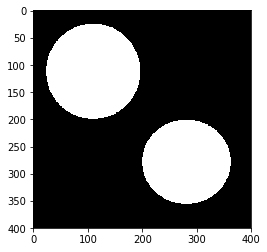

In [33]:
i = Image.open('Test/circle1.jpg').convert('L')
im = np.array(i)
plt.imshow(im,cmap='gray')
im = im.reshape(160000,1)

my_predicted_image = predict(d["w"], d["b"], im)

In [34]:
my_predicted_image

array([[1.]])

In [35]:
print(im)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
